# Entropic Dynamics of graph models - Curve Fitting

The curve fitting routines for the results of IVP shown in equations (26) and (27) of the paper.

In [2]:
# Load libraries

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import numpy as np
import pandas as pd


In [3]:
# Define the functions to fit

def Weibull(x, g, l, Z):
    return np.power(x/g, l-1)*np.exp(-np.power(x/g, l))/Z

def PowerLawCutoff(x, g, l, Z):
    return np.power(x, -g)*np.exp(-l*x)/Z

def Raddichi(x, g, l, Z):
    return np.power(x, -g)*np.exp(-l/x)/Z

def PowerLaw(x, g, Z):
    return np.power(x, -g)/Z


In [29]:
# Concatenate the functions in a dictionary

PDist = {0: Weibull, 1:PowerLawCutoff, 2:Raddichi, 3:PowerLaw}
PDistName = ["Weibull Fit", "Gamma Fit", "Raddichi Fit", "Power Law Fit"]

# File relative to IVP[(26), (27)]
DataFile = ["Data\Degree-Graph-YMax.dat", "Data\Degree-Graph-Con.dat"]
DataScale = ["log", "linear"]

Minima of local RMSE

IVP 26 Weibull Fit [1.6e-05, 0.001156, 0.217156] [0.09690596745478197, 8.292013209796834e-08, 6.910074583959013e-08]
IVP 26 Gamma Fit [1.6e-05, 0.0009, 0.133956, 0.8244640000000001] [0.6188665614506601, 7.81672306848644e-07, 3.766552566539415e-07, 8.6053779414633e-08]
IVP 26 Raddichi Fit [6.4e-05, 0.017424000000000002] [0.12679687965345363, 1.336717566065455e-05]
IVP 26 Power Law Fit [1.6e-05, 0.005475999999999999] [3.020270295014133, 5.8202867407166753e-05]
IVP 27 Weibull Fit [0.0002, 0.014706124999999997, 0.09923512499999998, 0.31920050000000005, 0.6384499999999999, 0.6401461249999999] [9.31393497744183e-09, 8.456645056362415e-09, 9.497146479828988e-08, 6.536525807158262e-08, 0.031408446791641925, 0.031408600521130786]
IVP 27 Gamma Fit [0.00405] [32.1776193563004]
IVP 27 Raddichi Fit [0.0008611250000000001, 0.009940499999999998, 0.17228450000000006, 0.5050124999999999] [0.0006236743612098028, 2.6424653203218863e-05, 5.954699732023966e-07, 0.6689054030063386]
IVP

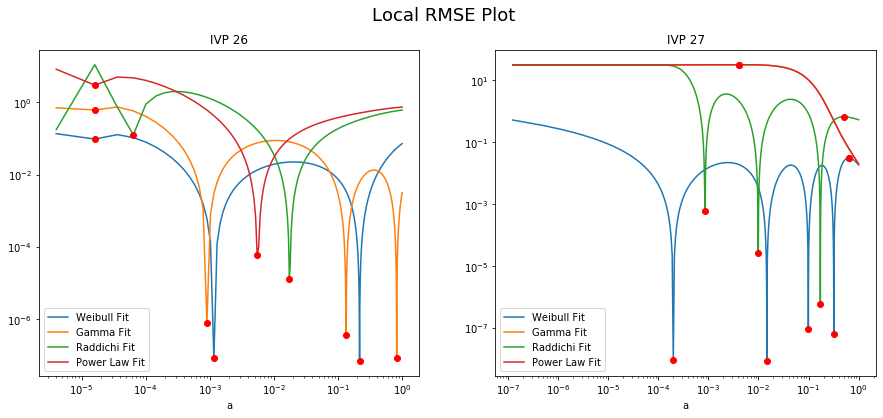

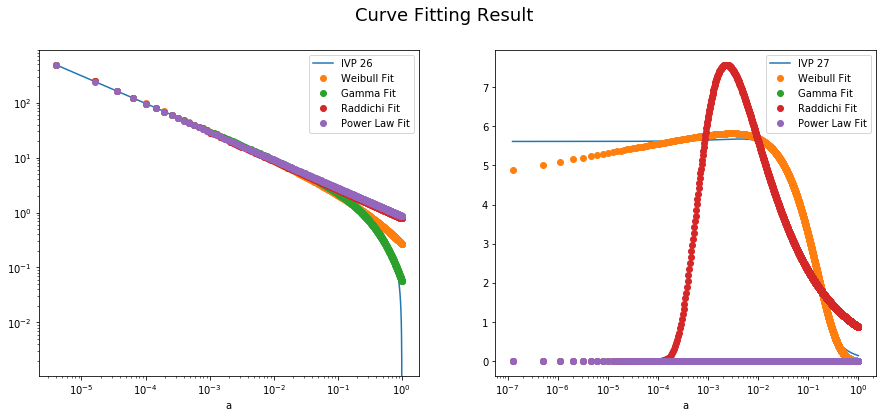

In [37]:
figname = "IVP {0}"
#lblname = "{0} Fit"

fig1, axR = plt.subplots(1,2, figsize=(15, 6))

fig2, axP = plt.subplots(1,2, figsize=(15, 6))

print(" \033[1m Minima of local RMSE\n \033[0m ")

for i in range(2):
    data = pd.read_table(DataFile[i], names=["A", "P"])
    axP[i].plot(data.A, data.P, label=figname.format(26+i))
    for j in range(4):
        popt, pcov = curve_fit(PDist[j], data.A, data.P)
        P_pred = PDist[j](data.A, *popt)
        RMSE_Local = np.power(data.P-P_pred, 2)
        peaks, _ = find_peaks(-RMSE_Local)
        print(figname.format(26+i), PDistName[j], list(data.A[peaks]), list(RMSE_Local[peaks]))
        axP[i].semilogx(data.A, P_pred, 'o', label=PDistName[j])
        axR[i].loglog(data.A, RMSE_Local, label=PDistName[j])
        axR[i].loglog(data.A[peaks], RMSE_Local[peaks], 'ro')
    axR[i].set_title(figname.format(26+i))
    axR[i].set_xlabel("a")
    axR[i].legend()
    axP[i].set_xlabel("a")
    axP[i].set_yscale(DataScale[i])
    axP[i].legend()


fig1.suptitle("Local RMSE Plot", fontsize=18)
fig2.suptitle("Curve Fitting Result", fontsize=18)

#plt.legend() 
plt.show()

Considering the preivous data we see that:

- Only the Weibull distribution fits the IVP (27) from $2e-4$ until $1$
- For the case of IVP (26) we have that all functions fit well from above 0 to a maximum according to:
> - Weibull: $a_{max} = 2e-1$ 
 - Gamma: $a_{max} = 8e-1$
 - Raddichi: $a_{max} = 2e-2$
 -  Power Law: $a_{max} = 5e-3$


Based on those results, we redo the curve fitting taking into account those regimes and finding the total RMSE

In [47]:
# Consider IVP 26 - a.k.a DataFile[0]
# Create an array for a_max relative to the dist. Check PDist dictionary order.
# PDist = {0: Weibull, 1:PowerLawCutoff, 2:Raddichi, 3:PowerLaw}
Amax = [2e-1, 8e-1, 2e-2, 5e-3]
#Amin = [4e-6, 4e-6, 6e-5, 4e-6]
idxMin = 0

print(" \033[1m Parameters for IVP 26 with constrained range\n \033[0m ")

data = pd.read_table(DataFile[0], names=["A", "P"])
for i in range(4):
    #idxMin = np.abs(data.A-Amin[i]).idxmin()
    idxMax = np.abs(data.A-Amax[i]).idxmin()
    Abar = data.A[idxMin:idxMax]
    Pbar = data.P[idxMin:idxMax]
    popt, pcov = curve_fit(PDist[i], Abar, Pbar)
    perr = np.sqrt(np.diag(pcov))
    P_pred = PDist[i](Abar, *popt)
    RMSE = np.sqrt(mean_squared_error(Pbar, P_pred))
    print("IVP 26", PDistName[i], popt, perr, RMSE)
    

  Parameters for IVP 26 with constrained range
  
IVP 26 Weibull Fit [0.82159516 0.50055988 0.91660742] [8.78787017e-03 5.91701748e-05 5.37796395e-03] 0.045339354277497614
IVP 26 Gamma Fit [0.5049813  2.79035215 1.08351144] [0.00016398 0.04682038 0.00204715] 0.16600648053408973
IVP 26 Raddichi Fit [1. 1. 1.] [inf inf inf] 74.52096199761846
IVP 26 Power Law Fit [0.50422568 1.0740082 ] [0.00041873 0.00519554] 0.3850082646170138


C:\Users\Felipe Xavier Costa\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [48]:
# Consider IVP 27 - a.k.a DataFile[1]
# We only consider the Weibull fit - a.k.a PDist[0]()

Amin = 2e-4
Amax = 1e0

data = pd.read_table(DataFile[1], names=["A", "P"])

idxMin = np.abs(data.A-Amin).idxmin()
idxMax = np.abs(data.A-Amax).idxmin()
Abar = data.A[idxMin:idxMax]
Pbar = data.P[idxMin:idxMax]
popt, pcov = curve_fit(PDist[0], Abar, Pbar)
perr = np.sqrt(np.diag(pcov))
P_pred = PDist[0](Abar, *popt)
RMSE = np.sqrt(mean_squared_error(Pbar, P_pred))
print("IVP 27", PDistName[0], popt, perr, RMSE)

IVP 27 Weibull Fit [0.14324769 1.02693071 0.15360371] [0.00037088 0.00061012 0.00028865] 0.11792139421346434
